# draw a set of measure lines on a group of pics

In [77]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t

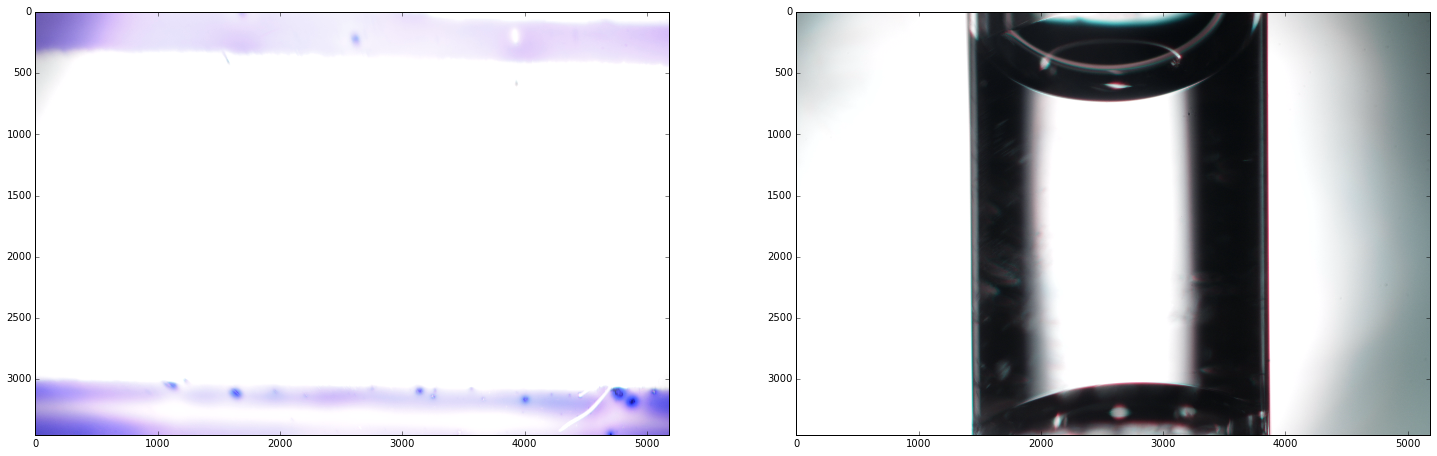

In [134]:
img = cv2.imread('./pic/IMG_0560.JPG')
scale_img = cv2.imread('./pic/2mm_redline_c2c.JPG')
#
top_left = (2000, 530)
bottom_right = (2100, 2000)
fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
#
plt.subplot(121)
plt.imshow(scale_img, cmap = 'gray')
#
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
#
plt.show()

## Manually find the number of px corresponding to the scale:

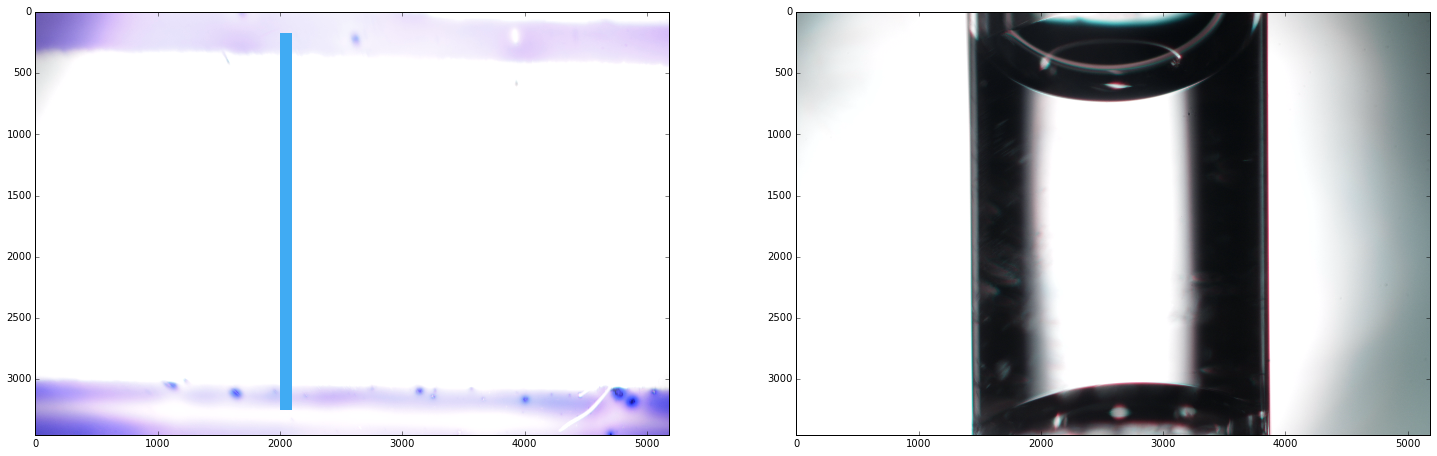

In [135]:
img = cv2.imread('./pic/IMG_0560.JPG')
scale_img = cv2.imread('./pic/2mm_redline_c2c.JPG')

# Find the location of the rectangle corresponding to the scale
top_left = (2000, 180)
bottom_right = (2100, 3250)

#Draw the rectangle and plot it 
color = (64, 171, 243)
# 
cv2.rectangle(scale_img, top_left, bottom_right, color, -1)
fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
#
plt.subplot(121)
plt.imshow(scale_img, cmap = 'gray')
#
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
#
plt.show()

In [115]:
def horz_measure_lines(img, scale_point_top, scale_point_bottom, scale_L,
                       major_grid_L, minor_grid_L,
                       major_grid_thickness=5, minor_grid_thickness=2, color=(64, 171, 243), 
                       left=0, right=img.shape[1]):
    # scale line is assumed to be vertical
    height = img.shape[0]
    scale_L_px = scale_point_bottom[1] - scale_point_top[1]
    major_grid_px = int(float(major_grid_L)/float(scale_L) * scale_L_px)
    minor_grid_px = int(float(minor_grid_L)/float(scale_L) * scale_L_px)
    #This many px reperesent a vertical line with length: scale_L
    y_major = 0
    for i in xrange(int(height/major_grid_px) + 1):  
        cv2.line(img,(left, y_major), (right, y_major), color, major_grid_thickness)
        y_minor = y_major + minor_grid_px
        for j in xrange(int(major_grid_px/minor_grid_px)):
            cv2.line(img,(left, y_minor), (right, y_minor), color, minor_grid_thickness)
            y_minor = y_minor + minor_grid_px
        y_major = y_major + major_grid_px

def time_format(time): 
    # TIME IN SECONDS IS THE INPUT
    hr = time/3600
    hr_str = '{0:02}'.format(hr)
    time = time - hr * 3600
    minute = time / 60
    minute_str = '{0:02}'.format(minute)
    sec = time - minute * 60
    sec_str = '{0:02}'.format(sec)
    return [hr_str, minute_str, sec_str]

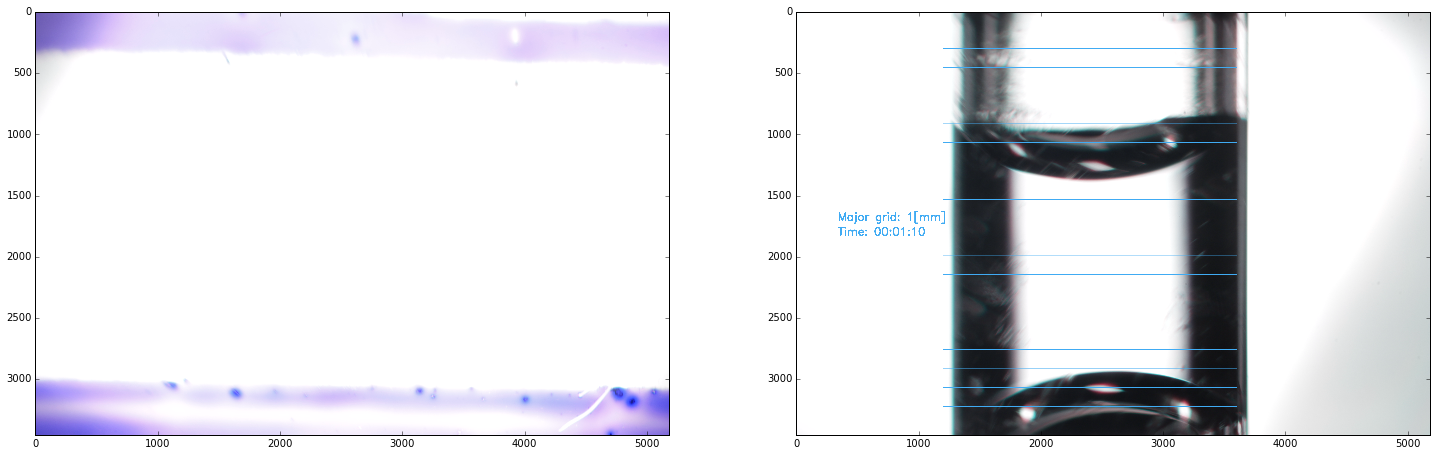

In [122]:
img = cv2.imread('./pic/IMG_0486.JPG')
scale_img = cv2.imread('./pic/2mm_redline_c2c.JPG')
#
scale_point_top = top_left
scale_point_bottom = bottom_right
scale_L = 2
major_grid_L = 1 
minor_grid_L = 0.1
left = 1200
right = 3600
#
horz_measure_lines(img, scale_point_top, scale_point_bottom, scale_L, major_grid_L, minor_grid_L, left=left, right=right)

# Add time
font = cv2.FONT_HERSHEY_SIMPLEX
height, width, channel = img.shape
x_time = width/2 - 2300 ; y_time = height/2 + 100;
#
color = (64, 171, 243)
t = time_format(70)
cv2.putText(img, 'Time: ' + t[0] + ':' + t[1] + ':' + t[2], (x_time, y_time), font, 3, color, thickness=10)
cv2.putText(img, 'Major grid: %r[mm]' %major_grid_L, (x_time, y_time - 120), font, 3, color, thickness=10)

fig01 = plt.figure(1, figsize=(25, 40), dpi=90)
#
plt.subplot(121)
plt.imshow(scale_img, cmap = 'gray')
#
plt.subplot(122)
plt.imshow(img, cmap = 'gray')
#
plt.show()

In [123]:
path_write = './processed/'
cv2.imwrite(path_write + 'IMG_' + '.JPG' , img)

True

## Apply it to all pics:

In [138]:
path_read = './pic/'
path_write = './processed/'
#
scale_point_top = top_left
scale_point_bottom = bottom_right
scale_L = 2
major_grid_L = 1 
minor_grid_L = 0.1
# draw horizontal lines from x = left to x = right
left = 1200
right = 3900
#
font = cv2.FONT_HERSHEY_SIMPLEX
height, width, channel = img.shape
x_time = width/2 - 2300 ; y_time = height/2 + 100;
#
color = (64, 171, 243)
#
pic_dist = 15
#
#
start_no = 560
end_no = 772
#
for i in xrange(start_no, end_no + 1):
    ext = '{0:04}'.format(i)
    img = cv2.imread(path_read + 'IMG_' + ext + '.JPG')
    #
    horz_measure_lines(img, scale_point_top, scale_point_bottom, scale_L, major_grid_L, minor_grid_L, left=left, right=right)
    t = time_format((i-start_no) * pic_dist)
    cv2.putText(img, 'Time: ' + t[0] + ':' + t[1] + ':' + t[2], (x_time, y_time), font, 3, color, thickness=10)
    cv2.putText(img, 'Major grid: %r[mm]' %major_grid_L, (x_time, y_time - 120), font, 3, color, thickness=10)

    #cropping
    y_up = 0; y_down = 3700; h = y_down - y_up;
    x_left = 100; x_right = 3900; w = x_right - x_left;
    crop_img = img[y_up:y_down, x_left:x_right]
    cv2.imwrite(path_write + 'IMG_' + ext + '.JPG' , crop_img)